# 다이아몬드 가격 예측하기

In [1]:
!pip install sklearn

In [2]:
# import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [3]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 데이터 불러오기 , 정보 확인

In [121]:
# 데이터 불러오기
diamonds = pd.read_csv("DiamondsPrices2022.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [122]:
diamonds['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53938    53939
53939    53940
53940    53941
53941    53942
53942    53943
Name: Unnamed: 0, Length: 53943, dtype: int64

In [123]:
# 의미없는 컬럼인 Unnamed drop 
diamonds.drop("Unnamed: 0", axis= 1 , inplace = True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [124]:
# info 확인
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


> null값 없음      
> 53943 rows      
> dtype 확인    

In [125]:
# 수치 데이터 
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> x , y , z 컬럼에 0 값이 왜 있지?

### 0값 데이터 정제

In [126]:
# x,y,z 컬럼이 0 값인 데이터 
diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)]
len(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index)

20

In [127]:
# 0 데이터 삭제
diamonds.drop(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index , inplace= True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [128]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,61.749432,57.456902,3930.927879,5.731628,5.734888,3.540042
std,0.473783,1.432336,2.234123,3987.179153,1.119392,1.140094,0.702511
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> 20개 데이터가 삭제 되어 53923 rows × 10 columns

In [129]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


> Q ) 원핫인코딩으로 정제하는게 좋을지 , 단계별 숫자를 할당 (ex 'Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 5,4,3,2,1) 해서 하는게 좋을지       
> A ) 순서에 의미가 있으면 숫자로 변환하면 된다. 1부터 시작하는게 좋다. 

### 데이터 정규화, 표준화 하는법
같은 단위로 측정한 컬럼은 같이 스케일 하면 된다. (x,y,z - mm)        
depth 처럼 계산되어있는 컬럼은 정규화 한 xyz로 다시 계산하여 새로 컬럼을 만든다.       
table 처럼 percentage 컬럼은 계산 식이 없기 때문에 100으로 나눠 정규화 한다.             
caret은 따로 정규화(min , max)            

## 컬럼 설명
- carat : 캐럿 (중량) 
| 다이아몬드 캐럿은 다이아몬드의 무게를 측정합니다         
| 0.2 ~ 5.01

- cut : 컷팅 
| 다이아몬드 컷은 다이아몬드의 면이 빛과 얼마나 잘 상호 작용하는지를 의미합니다               
| (하) Fair, Good, Very Good, Premium, Ideal (상)             

- color : 색 
| 화학적으로 순수하고 구조적으로 완벽한 다이아몬드는 순수한 물 한 방울과 같은 색조가 없으므로 결과적으로 더 높은 가치가 있습니다. (D~Z)             
| (상) D E F G H I J  (하)

- clarity : 투명도 
| 다이아몬드 선명도는 내포물 및 흠이 없음을 나타냅니다. (I1~IF)            
| (상) IF , VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (하)

- depth : total depth percentage = z / mean(x, y) 
| [ 2 * z / (x + y) ]               
| 43 ~ 79

- table : 다이아몬드 테이블 
| width of top of diamond relative to widest point(%)          
| 43 ~ 95

- price : 가격 
| 단위 $             
| 326 ~ 18823

- x : 측정 길이 length 
| 단위 mm          
| 3.73 ~ 10.74

- y : 측정 너비 width
| 단위 mm             
| 3.68 ~ 58.9

- z : 측정 깊이 depth
| 단위 mm              
| 1.07 ~ 31.8

> 설명 출처 : https://4cs.gia.edu/en-us/diamond-cut/

In [130]:
diamondsV2 = diamonds.copy()

### 글자 데이터 컬럼 변환
cut , color , clarity 컬럼

In [131]:
diamondsV2['cut'] = diamondsV2['cut'].map({"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5})
diamondsV2['color'] = diamondsV2['color'].map({"D" : 7 ,"E" : 6 ,"F" : 5 ,"G" : 4 , "H" : 3 , "I" : 2 , "J" : 1})
diamondsV2['clarity'] = diamondsV2['clarity'].map({"IF" : 8 , "VVS1" : 7 , "VVS2" : 6 , "VS1" : 5 , "VS2" : 4 , "SI1" : 3 , "SI2" : 2 , "I1" : 1})

In [132]:
diamondsV2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### 카테고리 컬럼 빈도수 확인

In [133]:
colums = ['cut' , 'color' , 'clarity']
for col in colums:
   print("Column :", col)
   print(diamonds[col].value_counts().sort_values())
   print("--------------------------------")

Column : cut
Fair          1609
Good          4902
Very Good    12082
Premium      13782
Ideal        21548
Name: cut, dtype: int64
--------------------------------
Column : color
J     2808
I     5421
D     6774
H     8298
F     9539
E     9799
G    11284
Name: color, dtype: int64
--------------------------------
Column : clarity
I1        738
IF       1790
VVS1     3654
VVS2     5066
VS1      8170
SI2      9185
VS2     12255
SI1     13065
Name: clarity, dtype: int64
--------------------------------


## 데이터 시각화

- cmap 설정값             
 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

 'Pastel1', 'Paired','Wistia', 'coolwarm',  'magma' ,'mako','seismic','bwr'

In [134]:
# 그래프용 좋음-나쁨 순서 
cut_order = [ "Ideal" , "Premium" , "Very Good" , "Good", "Fair"]
color_order = ["D","E","F","G", "H", "I", "J"]
clarity_order = ["IF", "VVS1", "VVS2" , "VS1" , "VS2" , "SI1" , "SI2", "I1"]

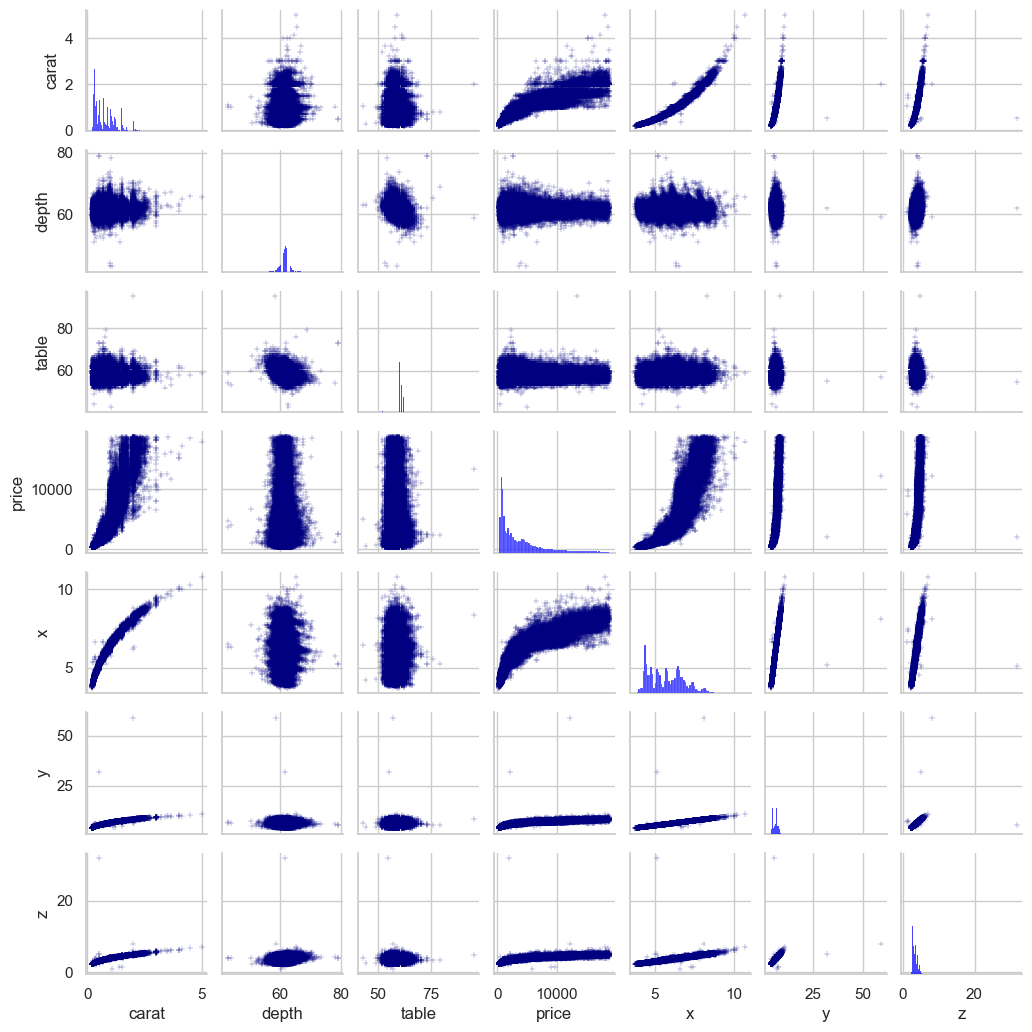

In [135]:
# plt.figure(figsize=(15,15))

sns.pairplot(
    diamonds,
    # hue= 'color',
    # hue_order = color_order,
    # palette = ,
    plot_kws = dict(marker = "+", alpha = 0.5, color = 'navy' , size = 0.1), # alpha = 0.1,
    diag_kws = dict(color = 'blue'),
    height= 1.5
    )

plt.show()

### 박스플랏 컬럼별로

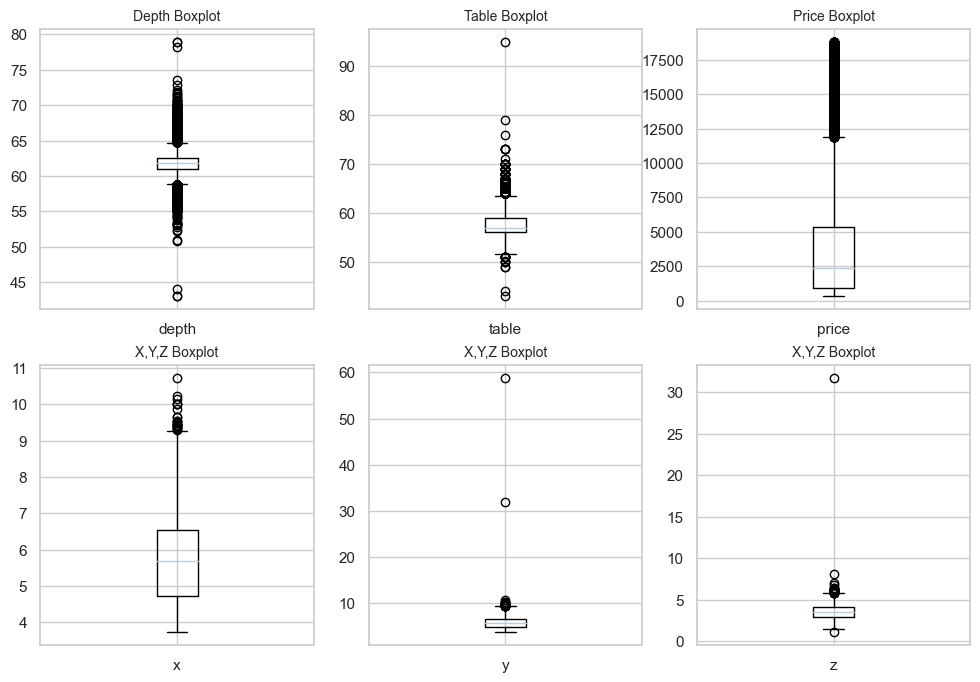

In [137]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.boxplot(
    diamonds['depth'],
    labels = ['depth']
)

ax2.boxplot(
    diamonds['table'],
    labels = ['table']
)
ax3.boxplot(
    diamonds['price'],
    labels = ['price']
)
ax4.boxplot(
        diamonds['x'],
        labels = ['x']
)
ax5.boxplot(
        diamonds['y'],
        labels = ['y']
)
ax6.boxplot(
        diamonds['z'],
        labels = ['z']
)
# ax1.set_ylim(48,75)
# ax2.set_ylim(40,80)
# ax5.set_ylim(0,20)
# ax6.set_ylim(0,10)

ax1.set_title('Depth Boxplot' , size = 10)
ax2.set_title('Table Boxplot' , size = 10)
ax3.set_title('Price Boxplot' , size = 10)
ax4.set_title('X,Y,Z Boxplot' , size = 10)
ax5.set_title('X,Y,Z Boxplot' , size = 10)
ax6.set_title('X,Y,Z Boxplot' , size = 10)
plt.show()

> 박스 사이즈 길이 보다 멀리 떨어져 있으면 이상치 이다.

> 몇 컬럼에서 이상치 제거 필요성 느낌            
> depth (48~75) , table (45~80) , y (0~20) , z (0~10)

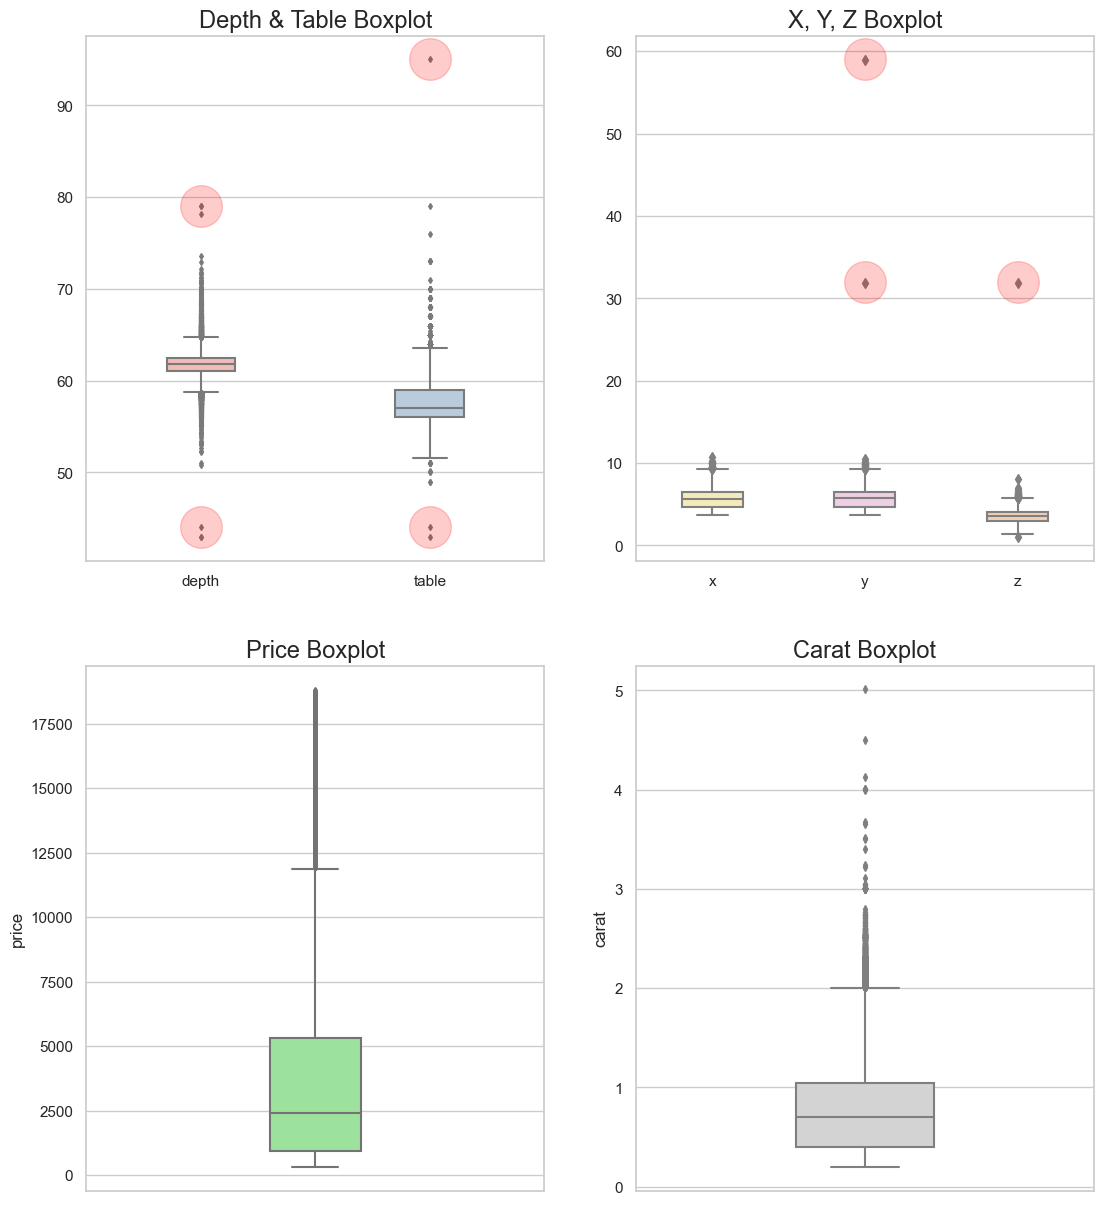

In [146]:
# 피피티용 박스플랏 그기
sns.set_theme(style="whitegrid", palette="Pastel1")

fig = plt.figure(figsize=(13,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(
    data = diamonds[['depth','table']],
    ax = ax1,
    # color= 'skyblue',
    width= 0.3,
    fliersize= 3
) 

ax1.plot([0,0,1,1] , [79,44,95,44] , marker = 'o' , color = 'red' , markersize = 30 , alpha = 0.2 , ls = "" )

sns.boxplot(
    data = diamonds[['x','y','z']],
    ax = ax2,
    # orient='h',
    palette= 'Pastel2_r',
    width= 0.4,
) 
ax2.plot([2,1,1] , [32,32,59] , marker = 'o' , color = 'red' , markersize = 30 , alpha = 0.2 , ls = "" ) #, markerfacecolor = "white"
sns.boxplot(
    y = diamonds['price'],
    ax = ax3,
    color= 'lightgreen',
    width= 0.2,
    fliersize= 2
) 
sns.boxplot(
    y = diamonds['carat'],
    ax = ax4,
    color= 'lightgray',
    width= 0.3,
    fliersize= 4
    
) 

ax1.set_title('Depth & Table Boxplot' , size = 17)
ax2.set_title('X, Y, Z Boxplot' , size = 17)
ax3.set_title('Price Boxplot' , size = 17)
ax4.set_title('Carat Boxplot' , size = 17)
plt.show()

### 이상치 제거

In [155]:
diamonds.drop(diamonds[(diamonds['depth'] < 48) | (diamonds['depth'] > 75)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['table'] < 45) | (diamonds['table'] > 80)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['y'] > 20)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['z'] > 10)].index , inplace= True)
diamonds
# 12개 삭제 되었다

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [156]:
# 카테고리컬럼 정제한 데이터도 이상치 제거
diamondsV2.drop(diamondsV2[(diamondsV2['depth'] < 48) | (diamondsV2['depth'] > 75)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['table'] < 45) | (diamondsV2['table'] > 80)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['y'] > 20)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['z'] > 10)].index , inplace= True)
# 12개 삭제 되었다

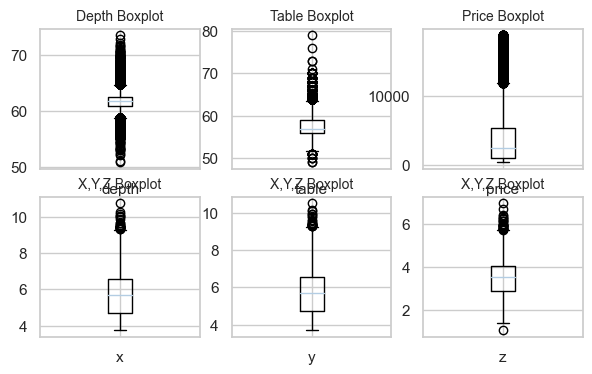

In [67]:
# 이상치 제거 후 박스플랏
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.boxplot(
    diamonds['depth'],
    labels = ['depth']
)

ax2.boxplot(
    diamonds['table'],
    labels = ['table']
)
ax3.boxplot(
    diamonds['price'],
    labels = ['price']
)
ax4.boxplot(
    diamonds['x'],
    labels = ['x']
)
ax5.boxplot(
    diamonds['y'],
    labels = ['y']
)
ax6.boxplot(
    diamonds['z'],
    labels = ['z']
)
# ax1.set_ylim(48,75)
# ax2.set_ylim(40,80)
# ax5.set_ylim(0,20)
# ax6.set_ylim(0,10)

ax1.set_title('Depth Boxplot' , size = 10)
ax2.set_title('Table Boxplot' , size = 10)
ax3.set_title('Price Boxplot' , size = 10)
ax4.set_title('X,Y,Z Boxplot' , size = 10)
ax5.set_title('X,Y,Z Boxplot' , size = 10)
ax6.set_title('X,Y,Z Boxplot' , size = 10)
plt.show()

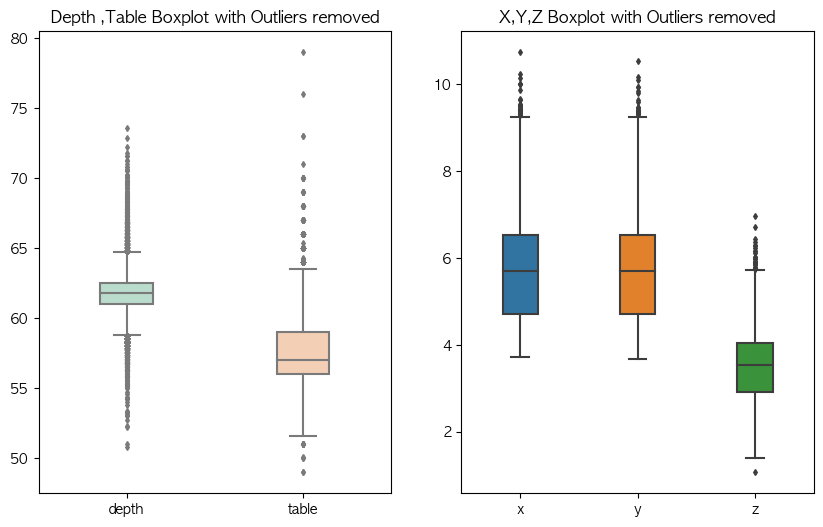

In [24]:
# 이상치 제거 후 박스플랏 보고서용
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(
    data = diamonds[['depth','table']],
    ax = ax1,
    width= 0.3,
    fliersize= 3,
    palette= 'Pastel2'
) 

sns.boxplot(
    data = diamonds[['x','y','z']],
    ax = ax2,
    width= 0.3,
    fliersize= 3
) 

ax1.set_title('Depth ,Table Boxplot with Outliers removed' , size = 12)
ax2.set_title('X,Y,Z Boxplot with Outliers removed' , size = 12)
plt.show()

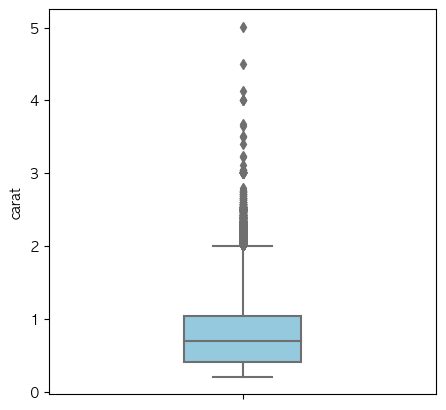

In [25]:
# 보고서용 그래프 만들기 테스트
plt.figure(figsize=(5,5))
sns.boxplot(
    y = diamonds['carat'],
    # ax = ax2,
    color= 'skyblue',
    width= 0.3
) 
plt.show()

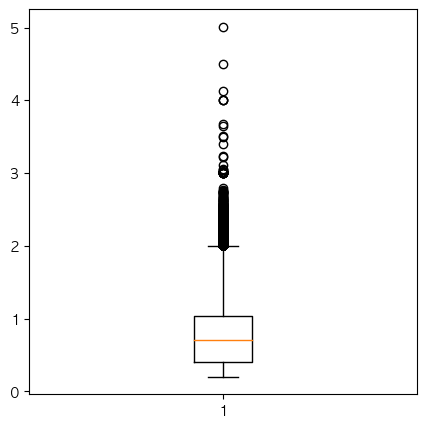

In [26]:
plt.figure(figsize=(5,5))
plt.boxplot(
    diamonds['carat'],
)
plt.show()

In [27]:
diamonds['cut'].value_counts().index
diamonds['cut'].value_counts().to_numpy()

array([21545, 13781, 12080,  4902,  1603])

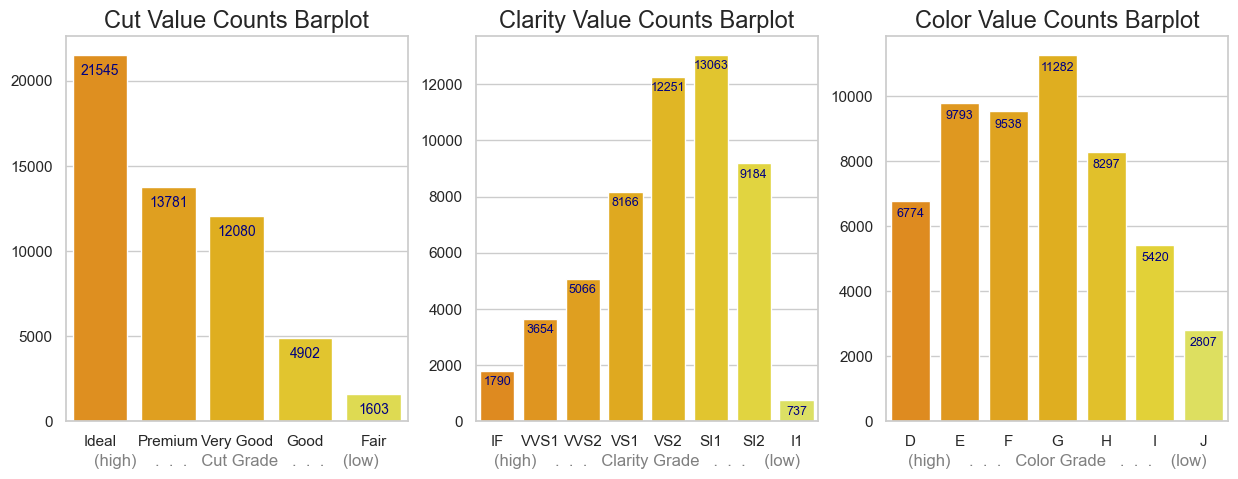

In [175]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(
    x = diamonds['cut'].value_counts().index,
    y = diamonds['cut'].value_counts().to_numpy(),
    order = cut_order,
    palette = "Wistia_r",
    # ci = None, # remove error bar
    ax = ax1
)
sns.barplot(
    x = diamonds['clarity'].value_counts().index,
    y = diamonds['clarity'].value_counts().to_numpy(),
    order = clarity_order,
    palette = "Wistia_r",
    # ci = None, # remove error bar
    ax = ax2
)
sns.barplot(
    x = diamonds['color'].value_counts().index,
    y = diamonds['color'].value_counts().to_numpy(),
    order = color_order,
    palette = "Wistia_r",
    # ci = None, # remove error bar
    ax = ax3
)
# 그래프 제목
ax1.set_title("Cut Value Counts Barplot", size = 17)
ax2.set_title("Clarity Value Counts Barplot", size = 17)
ax3.set_title("Color Value Counts Barplot", size = 17)
ax1.set_xlabel("(high)    .  .  .   Cut Grade   .  .  .    (low)" , color = 'gray' , size = 12)
ax2.set_xlabel("(high)    .  .  .   Clarity Grade   .  .  .    (low)", color = 'gray' , size = 12)
ax3.set_xlabel("(high)    .  .  .   Color Grade   .  .  .    (low)", color = 'gray' , size = 12)

# 그래프에 글자 출력용 리스트,딕셔너리
cut_vl = diamonds['cut'].value_counts().to_list()
clarity_vd = diamonds['clarity'].value_counts().to_dict()
color_vd = diamonds['color'].value_counts().to_dict()
clarity_vl = []
color_vl = []
# 그래프에 값 출력
for index , value in enumerate(cut_vl):
    ax1.annotate(value , xy = (index , value-1200), color='navy', ha="center" ,va = 'baseline',fontsize = 10)
axlist = [(ax2 ,clarity_vd,clarity_order), (ax3, color_vd , color_order)]
for ax in axlist:
    for index , value in enumerate(ax[2]):
        ax[0].annotate(ax[1][value] , xy = (index , ax[1][value]-500), color='navy', ha="center" , va = 'baseline',fontsize = 9)
        if ax[0] == ax2:
            clarity_vl.append(ax[1][value])
        else:
            color_vl.append(ax[1][value])

plt.show()

In [243]:
cutlb = []
claritylb = []
colorlb = []
for i in range(0,len(cut_order)):
    a = [cut_order[i] , cut_vl[i]]
    cutlb.append(a)
for i in range(0,len(clarity_order)):
    a = [clarity_order[i] , clarity_vl[i]]
    claritylb.append(a)
for i in range(0,len(color_order)):
    a = [color_order[i] , color_vl]
    colorlb.append(a)

<function dict.keys>

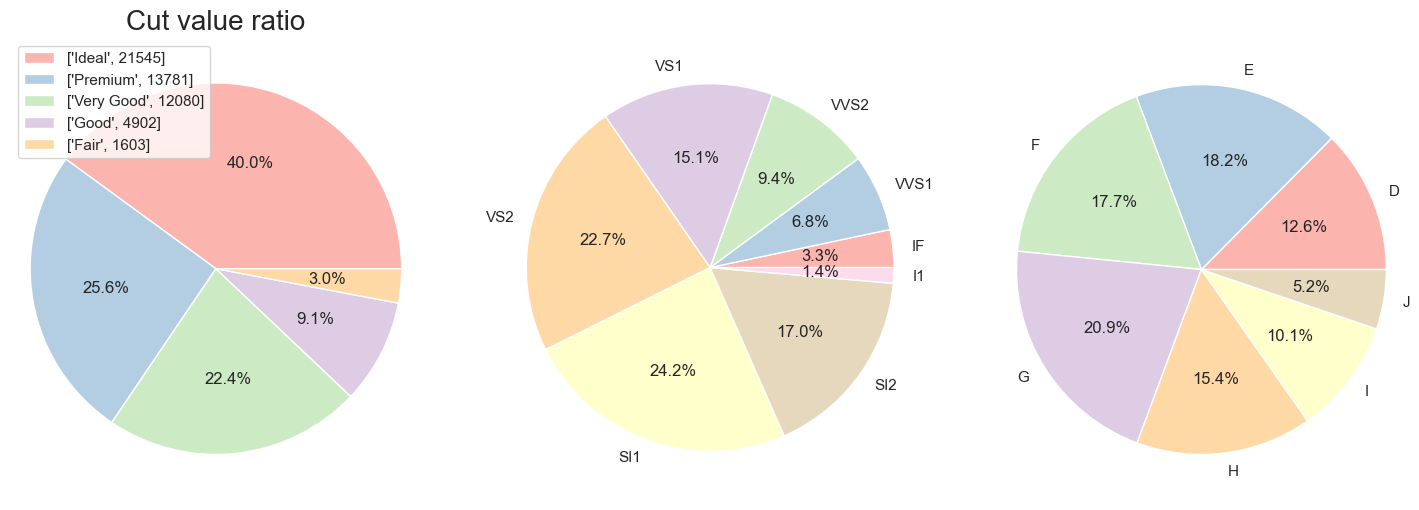

In [244]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.pie(
    cut_vl,
    autopct = '%.1f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 0, # 시작 각도
    # labels = cutlb ,
    )
ax2.pie(
    clarity_vl,
    autopct = '%.1f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 0, # 시작 각도
    labels = clarity_order,
    )
ax3.pie(
    color_vl,
    autopct = '%.1f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 0, # 시작 각도
    labels = color_order,
    )

ax1.set_title('Cut value ratio' , size = 20)
ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 
ax1.legend(labels = cutlb , loc = 'upper left') # lower right ,left / upper left , right / best
# ax2.legend(labels = clarity_order , loc = 'best') # lower right ,left / upper left , right / best
# ax3.legend(labels = color_order , loc = 'best') # lower right ,left / upper left , right / best

# add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.5, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
plt.show()

### 가격 기준 그래프

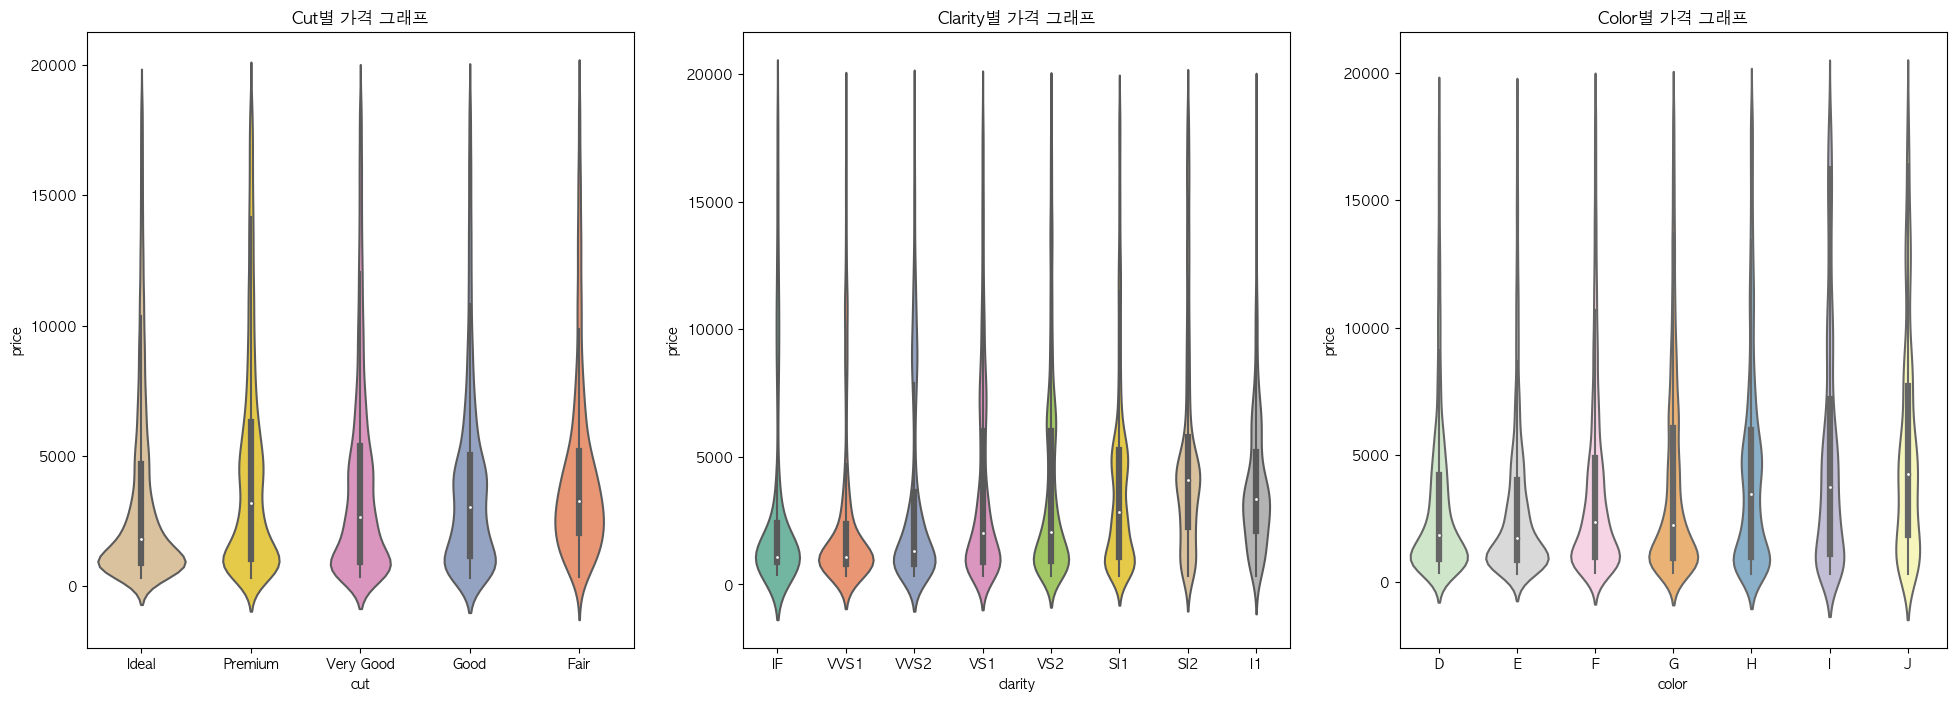

In [29]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.violinplot(
    'cut',
    'price',
    data=diamonds,
    order= cut_order,
    ax=ax1,
    palette= 'Set2_r',
)
sns.violinplot(
    'clarity',
    'price',
    data=diamonds,
    order=clarity_order,
    ax=ax2,
    palette= 'Set2',
)

sns.violinplot(
    'color',
    'price',
    data=diamonds,
    order=color_order,
    palette= 'Set3_r',
    ax=ax3,
)

ax1.set_title('Cut별 가격 그래프')
ax2.set_title('Clarity별 가격 그래프')
ax3.set_title('Color별 가격 그래프')
plt.show()

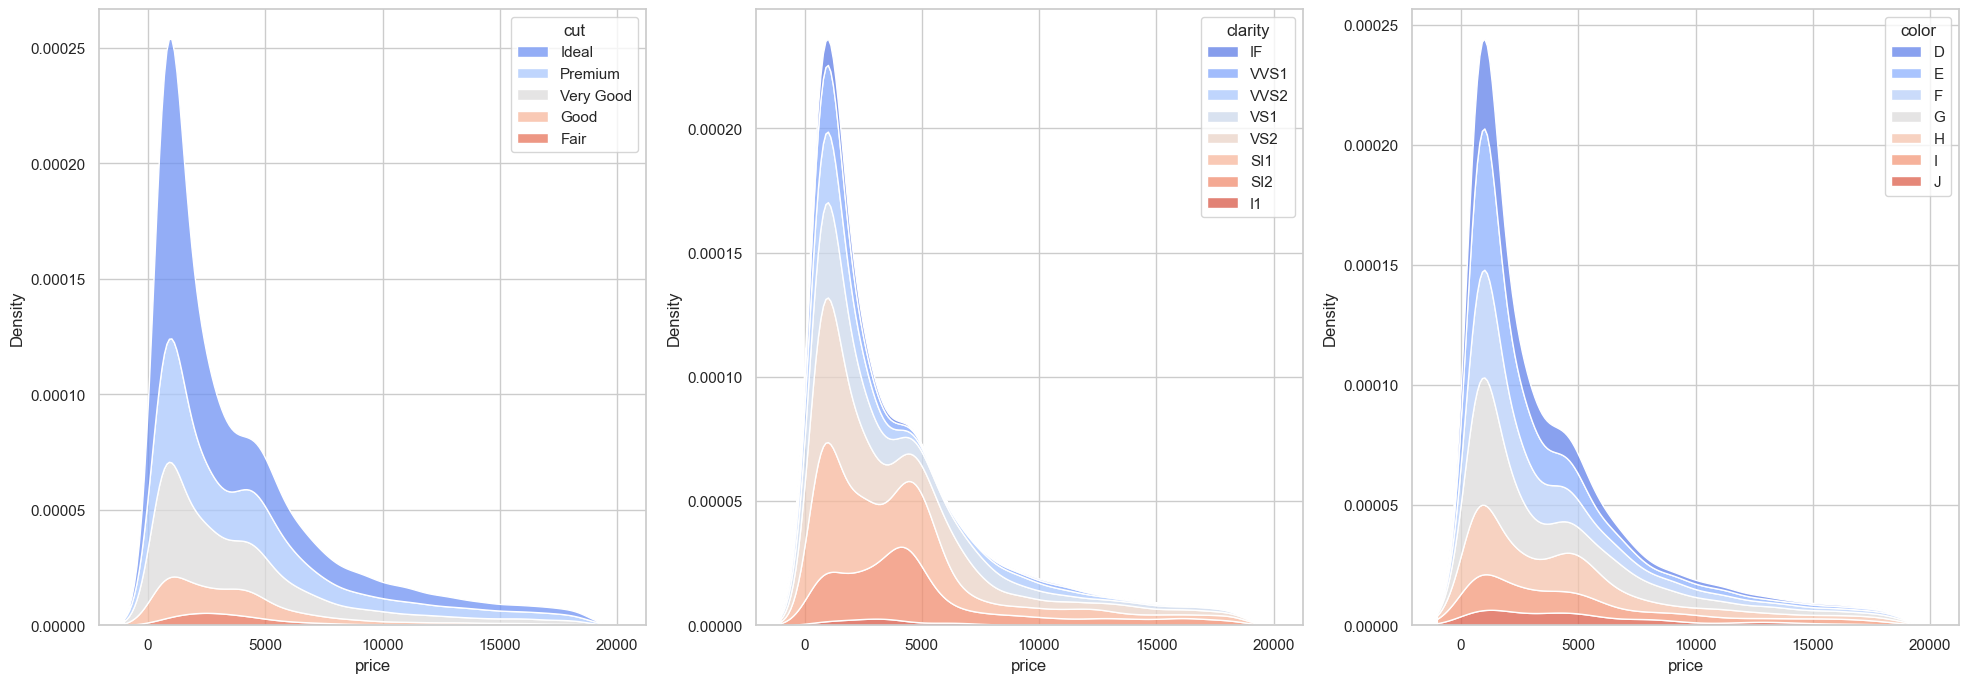

In [119]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="cut", 
    multiple="stack",
    hue_order= cut_order,
    ax = ax1,
    # shade= True,
    palette='coolwarm',
    # vertical= True
    )

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="clarity", 
    multiple="stack",
    hue_order= clarity_order,
    ax = ax2,
    # shade= True,
    palette='coolwarm',
    # vertical= True
    )

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="color", 
    multiple="stack",
    hue_order= color_order,
    ax = ax3,
    # shade= True,
    palette='coolwarm',
    # vertical= True
    )
plt.show()

### 캐럿 기준 그래프

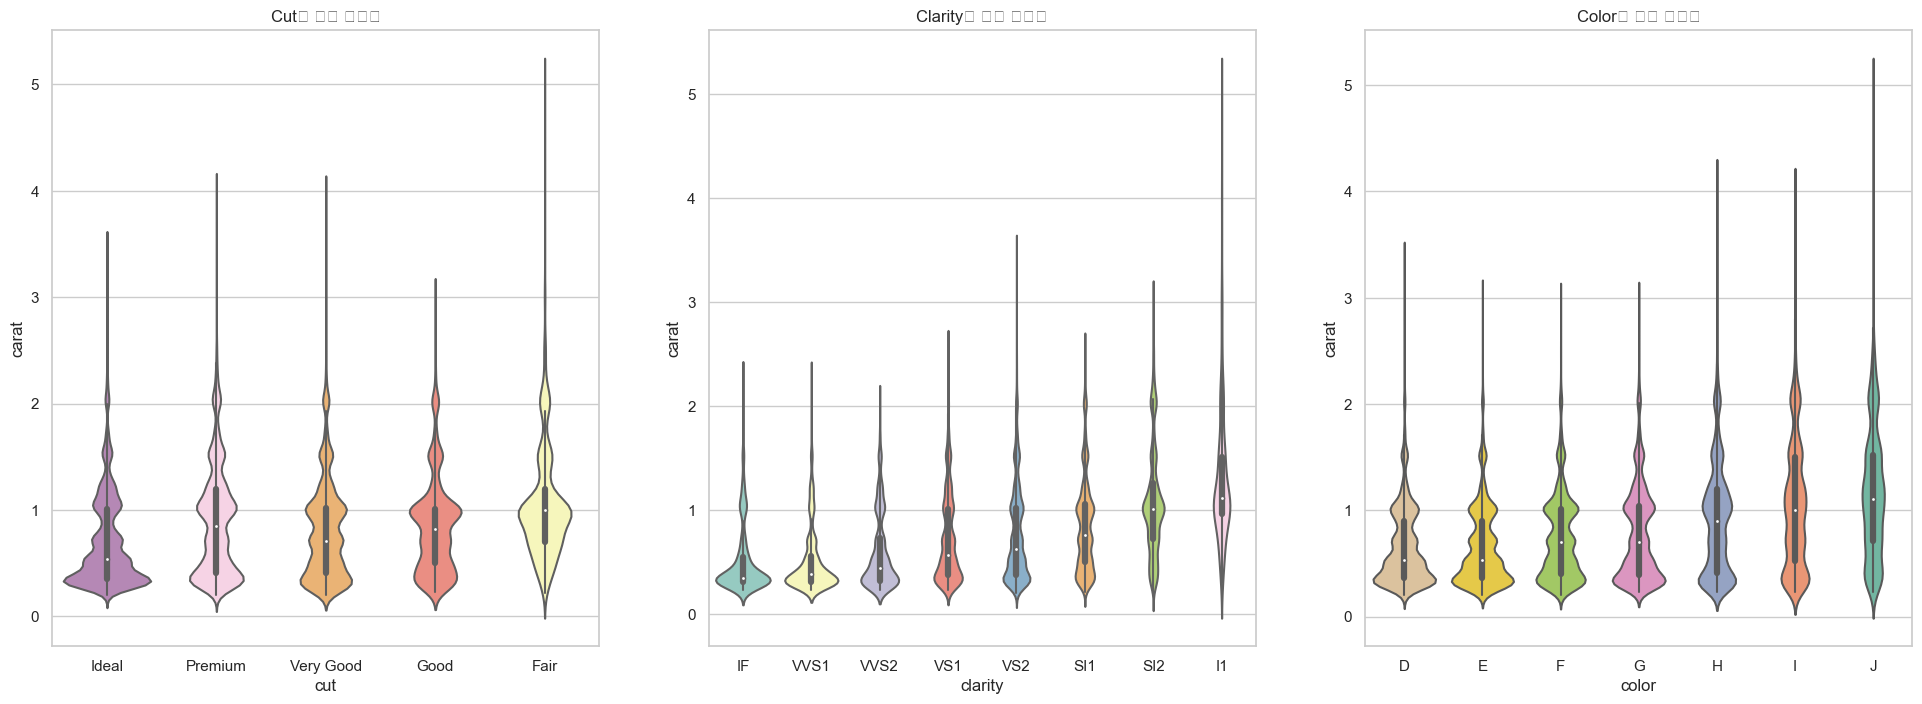

In [117]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.violinplot(
    'cut',
    'carat',
    data = diamonds,
    # alpha=0.2,
    order= cut_order,
    ax=ax1,
    palette= 'Set3_r',
)
sns.violinplot(
    'clarity',
    'carat',
    data = diamonds,
    # alpha=0.8,
    order= clarity_order,
    ax=ax2,
    palette= 'Set3',
)
sns.violinplot(
    'color',
    'carat',
    data = diamonds,
    # alpha=1,
    order= color_order,
    ax=ax3,
    palette= 'Set2_r',
)

ax1.set_title('Cut별 캐럿 그래프')
ax2.set_title('Clarity별 캐럿 그래프')
ax3.set_title('Color별 캐럿 그래프')
plt.show()

캐럿 kde그래프는 캐럿 큰 사이즈가 너무 안보여서 쓸수가 없으므로 사용 못 한다 (그래서 삭제함)

### 캐럿 - 가격 산점도

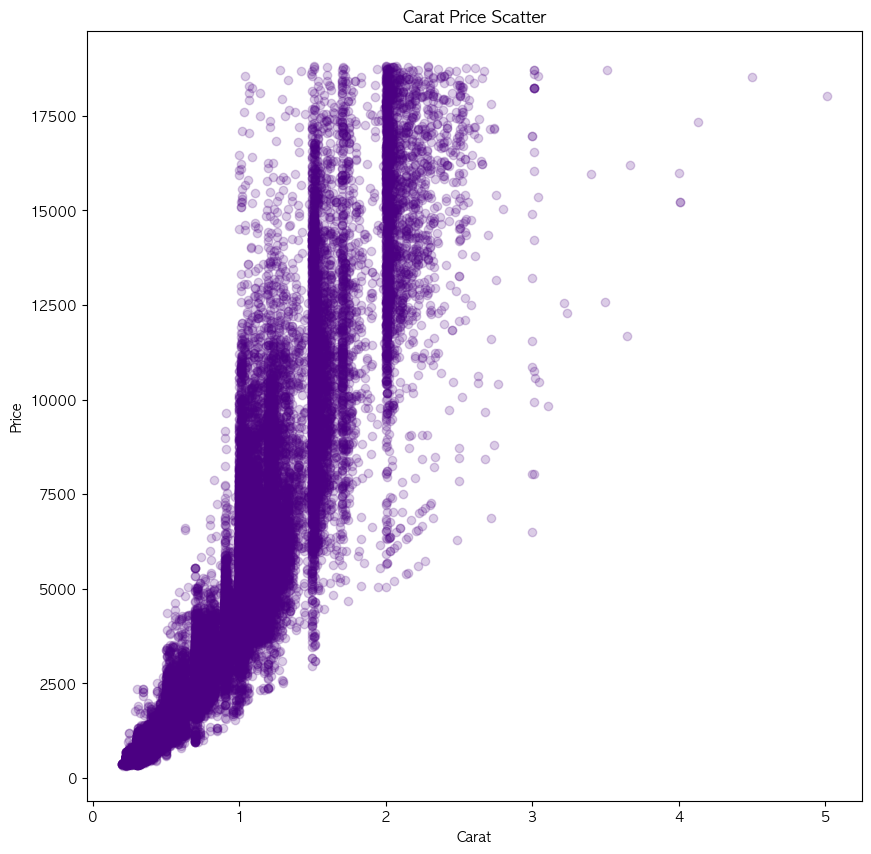

In [32]:
# 캐럿당 가격 산점도 색별 구분
plt.figure(figsize = (10,10))
plt.scatter(
    'carat',
    'price',
    data = diamonds,
    alpha=0.2,
    color = "indigo",
)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Carat Price Scatter")
plt.show()

### Price Per Carat (캐럿당 가격)와 카테고리 컬럼들

In [33]:
diamonds_2 = diamonds.copy()
diamonds_2['pricepercarat'] = round(diamonds_2['price']/diamonds_2['carat'])
diamonds_2 = diamonds_2.astype({'pricepercarat' : 'int64'})

In [34]:
# 카테고리형 수치로 변환 데이터 백업
diamondsV2.to_csv("diamonds_new.csv", index=False)
diamondsV2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


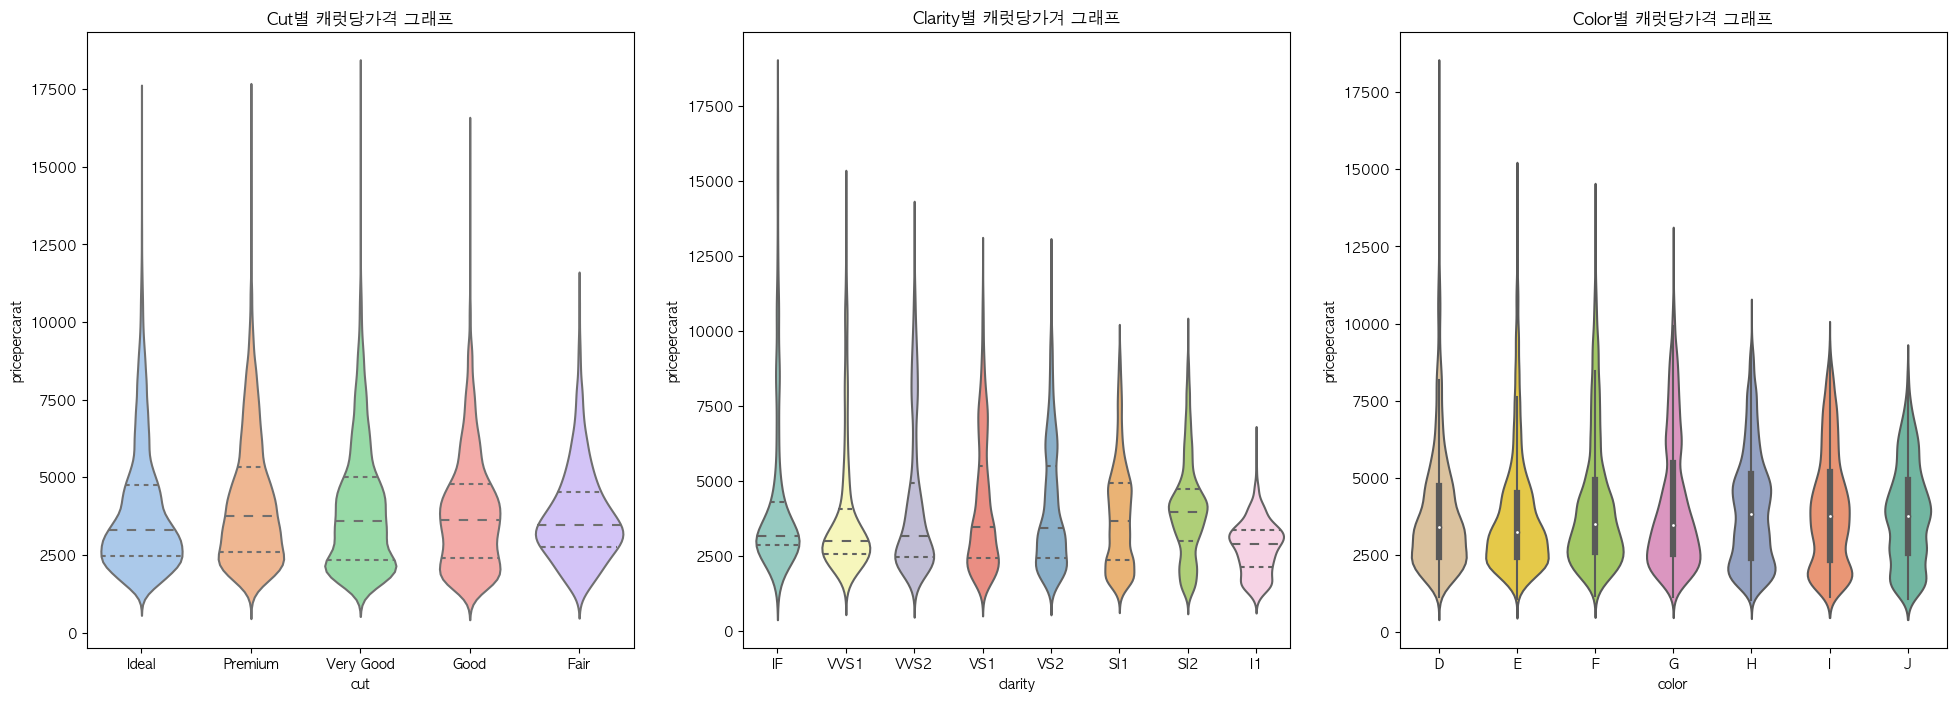

In [35]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.violinplot(
    'cut',
    'pricepercarat',
    data = diamonds_2,
    # alpha=0.2,
    order= cut_order,
    ax=ax1,
    palette= 'pastel',
    inner="quart",
)
sns.violinplot(
    'clarity',
    'pricepercarat',
    data = diamonds_2,
    # alpha=0.8,
    order= clarity_order,
    ax=ax2,
    palette= 'Set3',
    inner="quart",
)
sns.violinplot(
    'color',
    'pricepercarat',
    data = diamonds_2,
    # alpha=1,
    order= color_order,
    ax=ax3,
    palette= 'Set2_r',
)

ax1.set_title('Cut별 캐럿당가격 그래프')
ax2.set_title('Clarity별 캐럿당가겨 그래프')
ax3.set_title('Color별 캐럿당가격 그래프')
plt.show()

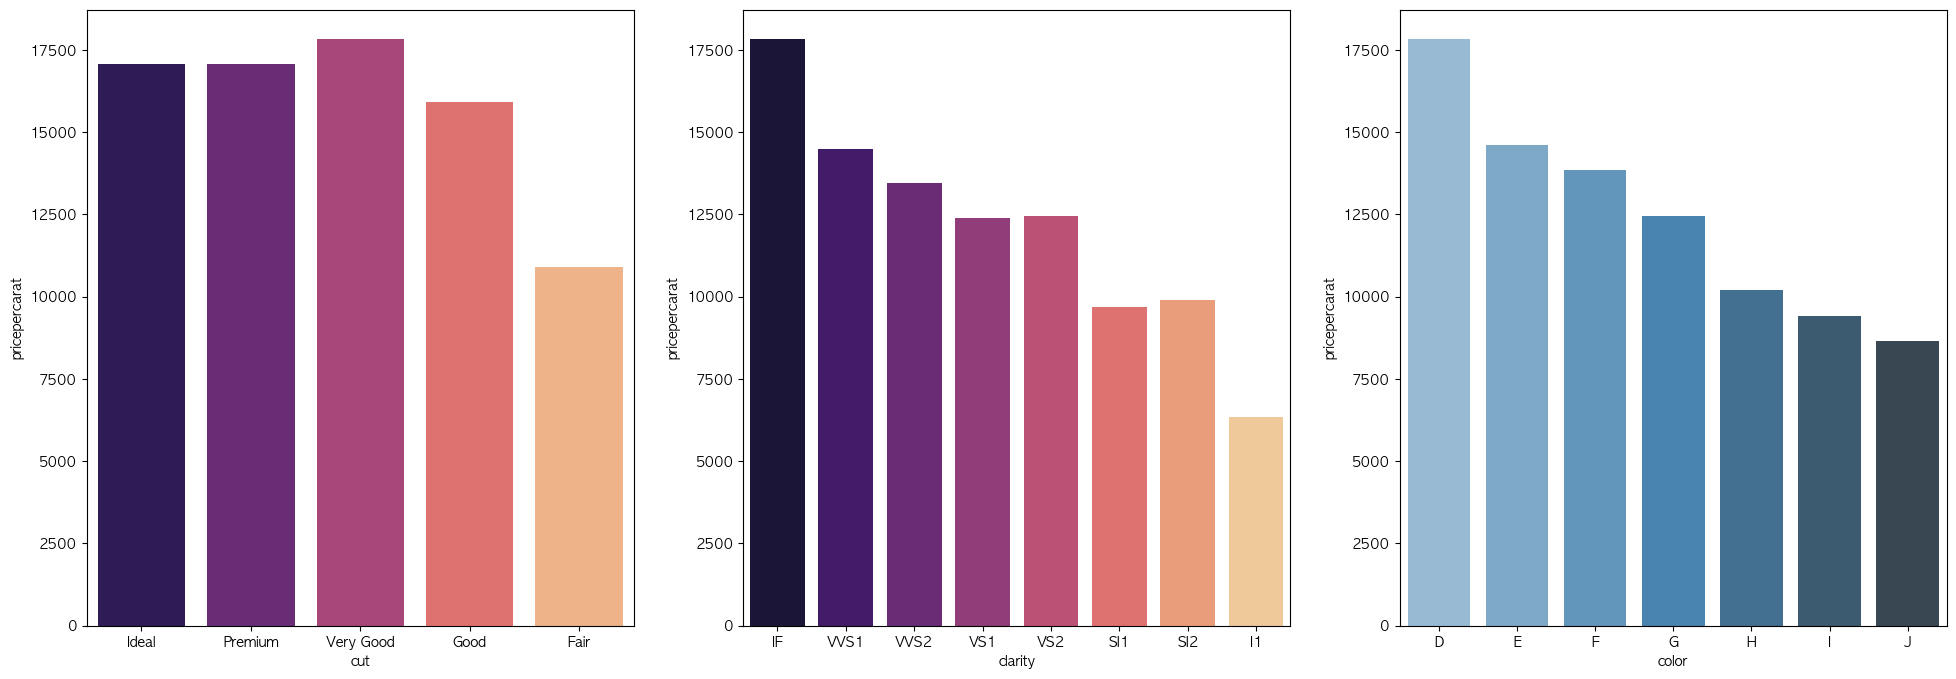

In [36]:
# draw barplot with seaborn

fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x = 'cut',
    y = 'pricepercarat',
    data = diamonds_2,
    order = cut_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax1,
)
sns.barplot(
    x = 'clarity',
    y = 'pricepercarat',
    data = diamonds_2,
    order = clarity_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax2,
)
sns.barplot(
    x = 'color',
    y = 'pricepercarat',
    data = diamonds_2,
    order = color_order,
    palette = "Blues_d",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax3,
)
plt.show()

cut - carat / clarity / color 그래프 그려보기

---

### 다이아몬드 상관계수

In [37]:
# 상관계수
diamondsV2.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134938,-0.291326,-0.352698,0.029260,0.181783,0.921594,0.977777,0.976860,0.976524
cut,-0.134938,1.000000,0.020719,0.189083,-0.219424,-0.433960,-0.053492,-0.126230,-0.125872,-0.152288
color,-0.291326,0.020719,1.000000,-0.025804,-0.049065,-0.027009,-0.172392,-0.270607,-0.270413,-0.274968
clarity,-0.352698,0.189083,-0.025804,1.000000,-0.067869,-0.160655,-0.146738,-0.372835,-0.367502,-0.376385
depth,0.029260,-0.219424,-0.049065,-0.067869,1.000000,-0.302260,-0.010287,-0.024419,-0.027560,0.097600
table,0.181783,-0.433960,-0.027009,-0.160655,-0.302260,1.000000,0.127057,0.196309,0.190129,0.155802
price,0.921594,-0.053492,-0.172392,-0.146738,-0.010287,0.127057,1.000000,0.887218,0.888812,0.882165
x,0.977777,-0.126230,-0.270607,-0.372835,-0.024419,0.196309,0.887218,1.000000,0.998657,0.991122
y,0.976860,-0.125872,-0.270413,-0.367502,-0.027560,0.190129,0.888812,0.998657,1.000000,0.990781
z,0.976524,-0.152288,-0.274968,-0.376385,0.097600,0.155802,0.882165,0.991122,0.990781,1.000000


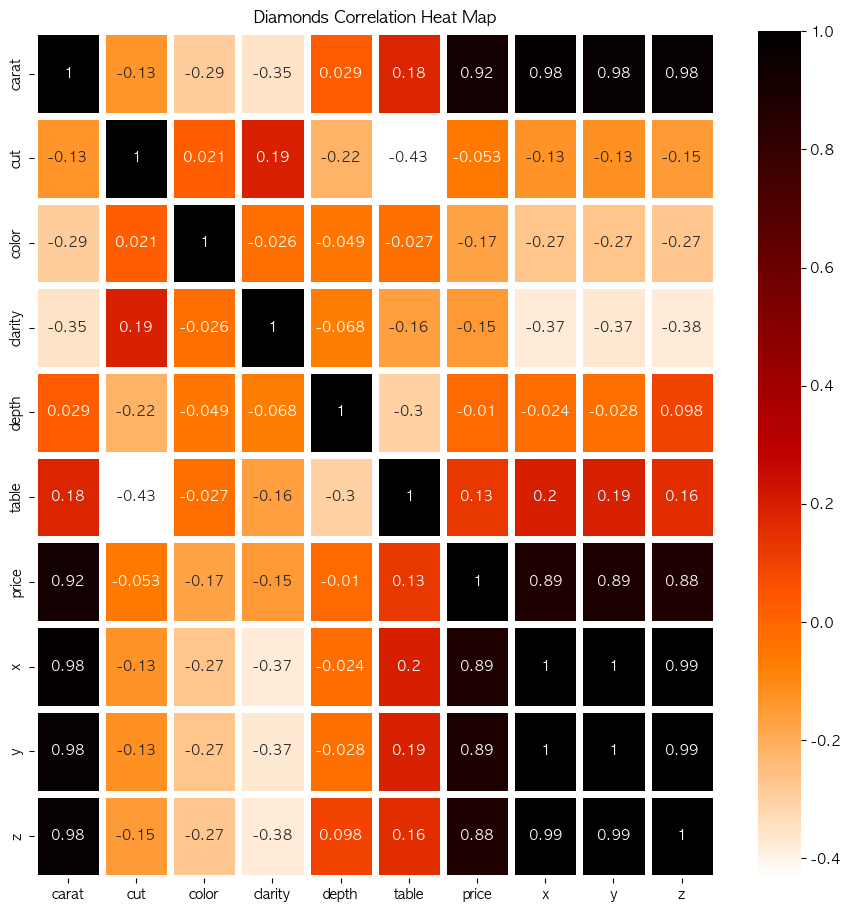

In [38]:
plt.figure(figsize=(11,11))
sns.heatmap(
    diamondsV2.corr(), # data
    annot= True, # 숫자 표기
    linewidths= 5, # 간격
    cmap = 'gist_heat_r',
    cbar= True , # 컬러바
)
plt.title("Diamonds Correlation Heat Map")
plt.show()

# 피쳐 컬럼들의 평균과 중앙값이 비슷하기 때문에 정규화를 하지 않고 머신러닝 만들어 본다
- 정규화를 해야할 시           
x,y,z : 같은 단위로 측정한 컬럼은 같이 스케일 하면 된다. (x,y,z - mm)        
depth : 정규화 한 xyz로 다시 계산하여 새로 컬럼을 만든다.       
table : percentage 컬럼은 계산 식이 없기 때문에 100으로 나눠 정규화 한다.             
caret : 정규화(max)            
cut, color, clarity : 최대값으로 나눠주면 된다.       
pricepercarat : 피쳐로 사용 못함 삭제한다

In [39]:
# diamonds_sc = diamondsV2.copy()

# diamonds_sc['table'] = diamonds_sc['table'] / 100
# diamonds_sc['carat'] = diamonds_sc['carat'] / diamonds_sc['carat'].max()
# diamonds_sc['cut'] = diamonds_sc['cut'] / diamonds_sc['cut'].max()
# diamonds_sc['color'] = diamonds_sc['color'] / diamonds_sc['color'].max()
# diamonds_sc['clarity'] = diamonds_sc['clarity'] / diamonds_sc['clarity'].max()



In [40]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53911.000000,53911.000000,53911.000000,53911.000000,53911.000000,53911.000000,53911.000000
mean,0.797658,61.749580,57.456434,3930.801636,5.731556,5.733385,3.539321
std,0.473761,1.420112,2.224625,3987.181104,1.119370,1.111240,0.691591
min,0.200000,50.800000,49.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.500000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


### 정규분포 보기

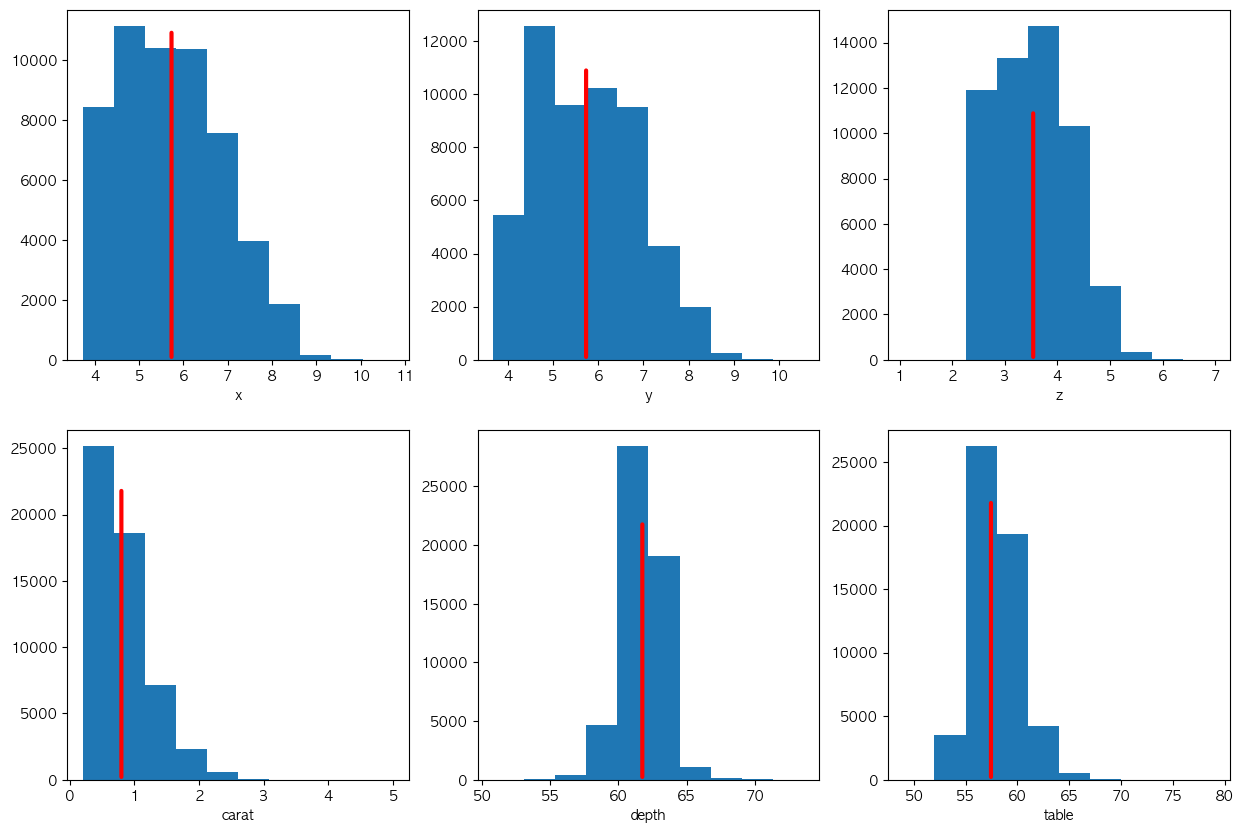

In [41]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]
col_list = ['x' , 'y','z','carat','depth','table']

for i , ax in enumerate(ax_list):
    ax.hist( col_list[i] , data=diamonds)
    # 평균선
    ax.annotate('',
        xy=(diamonds[col_list[i]].mean(), 0), # 화살표의 머리부분 , 끝점
            xytext=(diamonds[col_list[i]].mean(), 11000*(i//3 + 1)), # 화살표의 사작 부분
            arrowprops = dict(arrowstyle = '-', color='red',lw = 3), # 화살표 스타일 '-' 도 가능
    )
    # x 축
    ax.set_xlabel(col_list[i])
    # print(i , ax)

plt.show() 

---
# 머신러닝 

### 피쳐와 타겟 데이터 분리 , 학습, 검증, 테스트 데이터 분리

In [42]:
# Feature 와 Target 데이터 분리
dia_target = diamondsV2['price']
dia_data = diamondsV2.loc[:,diamondsV2.columns != 'price']

In [43]:
train_input , test_input, train_target, test_target = train_test_split(dia_data , dia_target ,test_size= 0.2,random_state= 42)

In [44]:
print(train_input.shape , test_input.shape , train_target.shape , test_target.shape)

(43128, 9) (10783, 9) (43128,) (10783,)


In [45]:
# 학습데이터와 검증데이터 분리
train_input , val_input, train_target, val_target = train_test_split(train_input , train_target ,test_size= 0.2,random_state= 42)

In [46]:
print(train_input.shape , val_input.shape , train_target.shape , val_target.shape)

(34502, 9) (8626, 9) (34502,) (8626,)
